In [35]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [21]:
from core import pds as pds
import numpy as np
from datetime import timedelta

In [22]:
# pds frame definition
psd1d_frame = pds.PDS1D_SingleSource()

In [23]:
# setup mesh
nx = 100
dx = 1
x = np.arange(0, nx * dx, dx)

d = 100
u_init = np.zeros(nx)
t0 = 0
lbc = 'Neumann'
rbc = 'Neumann'

In [24]:
# Load test data
from DSS_analyzer_Mariner import Data1D_GAUGE
test_gauge_dataframe = Data1D_GAUGE.Data1D_GAUGE('testdata/pressure_gauge_data.npz')

from DSS_analyzer_Mariner import Data1D_PumpingCurve
stage4_pumping_curve_dataframe = Data1D_PumpingCurve.Data1D_PumpingCurve('testdata/pumping_curve_stage4.npz')
stage5_pumping_curve_dataframe = Data1D_PumpingCurve.Data1D_PumpingCurve('testdata/pumping_curve_stage5.npz')

In [25]:
# Crop the gauge data into three parts
start_time_stg4 = stage4_pumping_curve_dataframe.get_start_time()
end_time_stg4 = stage4_pumping_curve_dataframe.get_end_time()

start_time_stg5 = stage5_pumping_curve_dataframe.get_start_time()
end_time_stg5 = stage5_pumping_curve_dataframe.get_end_time()

In [26]:
stg4_pg_dataframe = test_gauge_dataframe.copy()
stg4_pg_dataframe.crop(start_time_stg4, end_time_stg4)

In [27]:
interval_pg_dataframe = test_gauge_dataframe.copy()
interval_pg_dataframe.crop(end_time_stg4, start_time_stg5)

In [28]:
stg5_pg_dataframe = test_gauge_dataframe.copy()
stg5_pg_dataframe.crop(start_time_stg5, end_time_stg5)

In [29]:
# pass the parameters
psd1d_frame.set_mesh(x)
psd1d_frame.set_diffusivity(d)
psd1d_frame.set_initial(u_init)
psd1d_frame.set_bcs(lbc, rbc)
psd1d_frame.set_t0(t0)
psd1d_frame.set_sourceidx(int(len(x)/2)) # set the source index at the middle of the mesh

Diffusivity is a single scalar value, broadcasted to the mesh length.


In [56]:
# For the test purpose, crop the gauge data
test_gauge_dataframe = stg4_pg_dataframe.copy()
# decide the time range
test_start_time = start_time_stg4 + timedelta(seconds=200)
test_end_time = test_start_time + timedelta(seconds=200)
test_gauge_dataframe.crop(test_start_time, test_end_time)
# Pre process the PG data
test_gauge_dataframe.data -= np.min(test_gauge_dataframe.data)

In [57]:
# pass the gauge data
psd1d_frame.set_source(test_gauge_dataframe)

Message from pds: Source set done.
Also, just a reminder: please make sure the data is cropped properly.


In [63]:
# Test snapshot
psd1d_frame.solve(optimizer= False, dt = 2, t_total= 200, print_progress=False)

Time array generated using t_total.


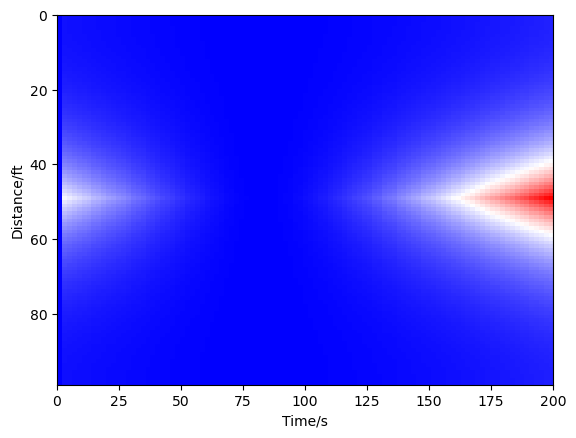

In [59]:
psd1d_frame.plot_solution()

In [60]:
import matplotlib.pyplot as plt

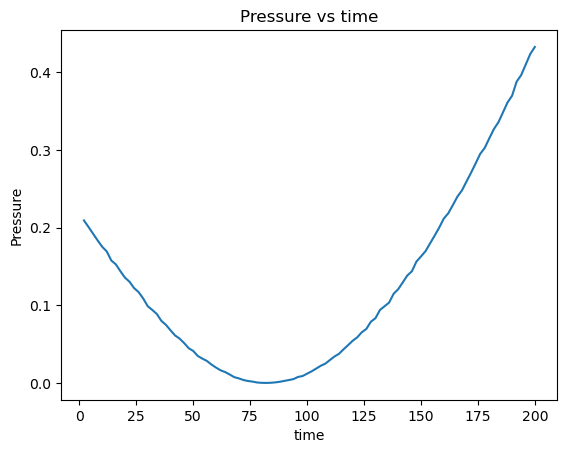

In [61]:
plt.figure()
plt.plot(psd1d_frame.taxis[1:], psd1d_frame.get_val_at_idx(20)[1:])
plt.xlabel("time")
plt.ylabel("Pressure")
plt.title("Pressure vs time")
plt.show()

In [62]:
np.unique(psd1d_frame.get_val_at_idx(40))

array([0.00000000e+00, 2.51110292e-04, 7.38703092e-04, 1.00249111e-03,
       2.43120504e-03, 2.91807922e-03, 5.96838183e-03, 6.98999407e-03,
       9.87782471e-03, 1.03615125e-02, 1.47689578e-02, 1.49093448e-02,
       1.93227772e-02, 2.29236881e-02, 2.91536469e-02, 3.01592051e-02,
       3.46045505e-02, 4.23339131e-02, 4.65383264e-02, 5.45797238e-02,
       5.82969284e-02, 6.32741907e-02, 7.20650871e-02, 7.69207726e-02,
       8.61484504e-02, 9.20606129e-02, 9.65818746e-02, 1.10010472e-01,
       1.14753124e-01, 1.21709142e-01, 1.32217098e-01, 1.34934652e-01,
       1.45795420e-01, 1.59867395e-01, 1.68368843e-01, 1.73904821e-01,
       1.89244355e-01, 1.99477945e-01, 2.11060492e-01, 2.21760237e-01,
       2.28076681e-01, 2.37700141e-01, 2.53481464e-01, 2.63537365e-01,
       2.70237452e-01, 2.90697786e-01, 3.06321859e-01, 3.10345730e-01,
       3.23798474e-01, 3.44838081e-01, 3.65240163e-01, 3.65253044e-01,
       3.83435444e-01, 3.83785450e-01, 4.01898932e-01, 4.22618542e-01,
      